In [4]:
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Preparing Dataset

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_Gender = LabelEncoder()

data['Gender_encod'] = le_Gender.fit_transform(data['Gender'])


In [9]:
df = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encod']]

In [10]:
df.rename(columns={"Annual Income (k$)" : "Annual Income",
                  'Spending Score (1-100)' : "Spending Score", 
                  "Gender_encod" : "Gender"}, inplace=True)

In [11]:
df

,Age,Annual Income,Spending Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


#### Normalizing over the standard deviation


In [12]:
from sklearn.preprocessing import StandardScaler

X = df.values
X = np.nan_to_num(X)

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

##### Modeling - using k-means on our dataset, and take look at cluster labels.


In [13]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


#### Insights, assign the labels to each row in df

In [14]:
df["Clus_km"] = labels
df.head(5)

,Age,Annual Income,Spending Score,Gender,Clus_km
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,0
3,23,16,77,0,0
4,31,17,40,0,0


We can easily check the centroid values by averaging the features in each cluster.

In [15]:
df.groupby('Clus_km').mean()

,Age,Annual Income,Spending Score,Gender
Clus_km,,,,
0,40.325203,44.154472,49.829268,0.406504
1,32.692308,86.538462,82.128205,0.461538
2,40.394737,87.000000,18.631579,0.526316


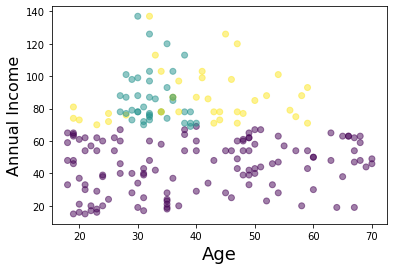

In [17]:
# Age & Income
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income', fontsize=16)

plt.show()

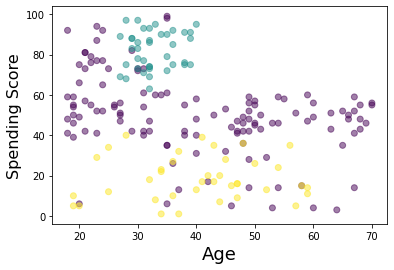

In [18]:
# Age & Spending Score

plt.scatter(X[:, 0], X[:, 2], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

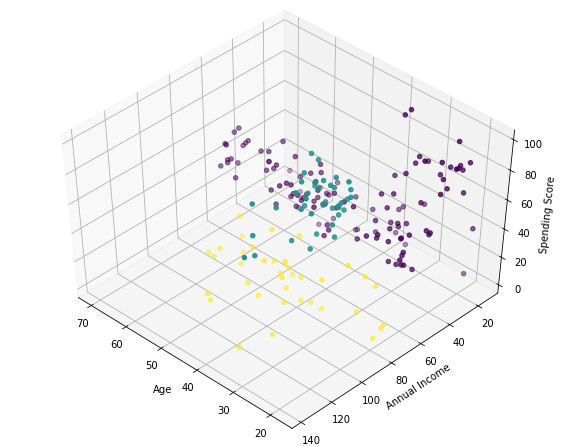

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))


#### Finding the optimal "K" in K-Means

In [20]:
from sklearn.metrics import silhouette_score

X= df.iloc[:,:4].to_numpy()

silhouette_scores ={}
for k in range(2,10):
    
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(X)
    y_pred = k_means.predict(X,k)
    silhouette_scores[k]= silhouette_score(X,y_pred)

In [21]:
silhouette_scores

{2: 0.29307334005502633,
 3: 0.383798873822341,
 4: 0.4052954330641215,
 5: 0.4440669204743008,
 6: 0.45205475380756527,
 7: 0.43949619264530887,
 8: 0.4294563708430266,
 9: 0.39823663501493584}

######  The optimal K should be K=6 or K=5, 

Found that k=5 will cluster better

In [24]:
def KMeans_Model(clusterNum):
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
    k_means.fit(X)
    labels = k_means.labels_
    return labels

In [26]:
KMeans_Model(5)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [27]:
df["Clus_km5"] = labels
df.head(5)

,Age,Annual Income,Spending Score,Gender,Clus_km,Clus_km5
0,19,15,39,1,0,0
1,21,15,81,1,0,0
2,20,16,6,0,0,0
3,23,16,77,0,0,0
4,31,17,40,0,0,0


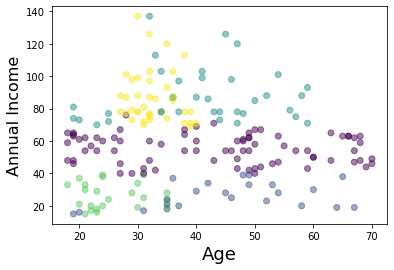

In [28]:
# Age & Income
plt.scatter(X[:, 0], X[:, 1], c= KMeans_Model(5).astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income', fontsize=16)

plt.show()

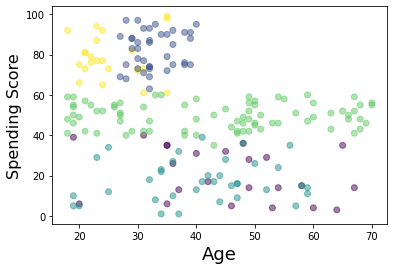

In [29]:
# Age & Spending Score

plt.scatter(X[:, 0], X[:, 2], c= KMeans_Model(5).astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

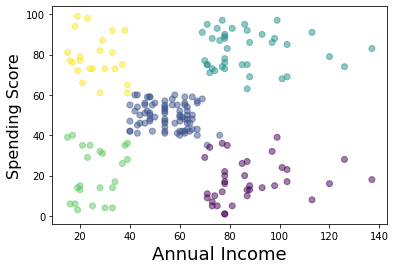

In [31]:
# Income & Spending Score

plt.scatter(X[:, 1], X[:, 2], c= KMeans_Model(5).astype(np.float), alpha=0.5)
plt.xlabel('Annual Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

Findings:

- cluster light green: **low income low spenders**
- cluster dark green: **high income high spenders**
- cluster purple: **high income low spenders**
- cluster yellow: **low income and high spenders**
- cluster blue: **middle class average spenders**

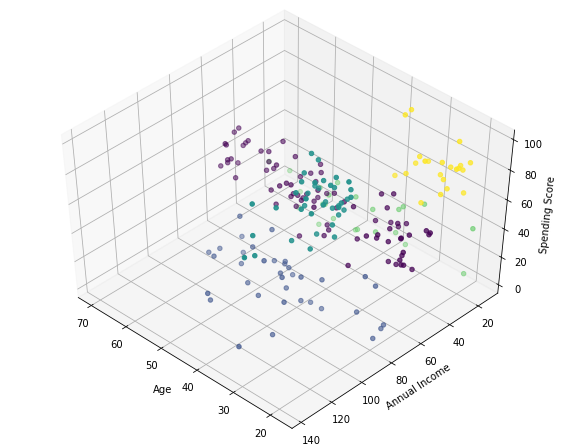

In [33]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= KMeans_Model(5).astype(np.float))


### Another way to find the optimal K

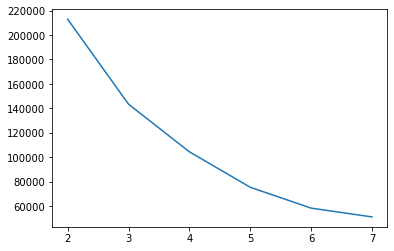

In [141]:
# Elbow curve method to find the ideal number of clusters.

X= df.iloc[:,:4].to_numpy()
clusters=list(range(2,8))
ssd = []

for k in clusters:
    
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12, max_iter=150, random_state= 50)
    k_means.fit(X)
    ssd.append(k_means.inertia_)

plt.plot(clusters,ssd);